# Project 2 - Thera Bank Personal Loan Campaign

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


# Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer in USD ,000
- ZIP Code Home Address ZIP code
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month in USD ,000
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. in USD ,000
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
 - Number of unique in each column?
 - Number of people with zero mortgage?
 - Number of people with zero credit card spending per month?
 - Value counts of all categorical columns.
 - Univariate and Bivariate
 - Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)
5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)
6. Give Business understanding of your model? (5 marks)

# Step1
<b> Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)</b> 

<b> Import the libraries</b> 

In [581]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color


#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# calculate accuracy measures and confusion matrix
from sklearn import metrics



from IPython.display import display #---------------------for displaying multiple data frames in one output

<b> Import the datasets </b> 

In [582]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
display(df.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<b> Check datatype, Null values </b> 

In [583]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<b> Statistical summary</b> 

In [584]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


 <b>Shape</b>

In [585]:
print("Shape of the data:", df.shape)

Shape of the data: (5000, 14)


<b>Incorrect imputation</b>
1. Check if ID is duplicated.
2. Replace the negative experience with mode value of same age and education level.
3. Check the odd 4digit zip code.

Based on the statistical summary performed above, other columns values looks fine

<b>1. Check if ID is duplicated</b>

In [586]:
df[df.duplicated('ID')] # checking if any duplicate IDs

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


- No duplicate records with same ID

<b> 2. Replace the negative experience with mode value of same age and education</b>

In [587]:
print('Total records with negative experience:', df[df['Experience'] < 0]['Age'].count())

Total records with negative experience: 52


In [588]:
df[df['Experience'] < 0].groupby(['Age','Education'])['Education'].count() #normalize=True

Age  Education
23   1             7
     2             5
24   1             5
     2             6
     3             6
25   1             4
     2             4
     3            10
26   2             1
28   3             1
29   3             3
Name: Education, dtype: int64

- Negative experience is for records whose age is 23 24 25 26 28 and 29. Replacing them with the mode value of same <b>age and education</b> will be the nearest value.

In [589]:
df2 = df.loc[df['Age'].isin([23, 24, 25, 26, 28, 29])]
df2[df2['Experience'] >= 0].groupby(['Age','Education'])['Experience'].value_counts() #normalize=True

Age  Education  Experience
24   1          0              8
     2          0              2
     3          0              1
25   1          1             16
                0              3
     2          0              6
                1              1
     3          0              8
                1              1
26   1          2             19
                0              6
                1              5
     2          0              9
                1              9
                2              5
     3          0             13
                1              8
                2              3
28   1          4             21
                3             17
                2              9
     2          3             11
                4             11
                2             10
                1              2
     3          2             10
                3              9
                4              2
29   1          5             22
                

- Since there are no postive experience records for age 23. i will set the experience to 0
- For 24 the only postivie experieince is 0, so i will set the experience to 0
- For others i will take the mode

In [590]:
df0= df.copy()
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 23) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 23), "Experience"] = 0
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 23) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
670    671   23          -1      61     92374       4   2.60          1   
909    910   23          -1     149     91709       1   6.33          1   
2430  2431   23          -1      73     92120       4   2.60          1   
2618  2619   23          -3      55     92704       3   2.40          2   
2717  2718   23          -2      45     95422       4   0.60          2   
2962  2963   23          -2      81     91711       2   1.80          2   
3130  3131   23          -2      82     92152       2   1.80          2   
3157  3158   23          -1      13     94720       4   1.00          1   
3425  3426   23          -1      12     91605       4   1.00          1   
3824  3825   23          -1      12     95064       4   1.00          1   
4285  4286   23          -3     149     93555       2   7.20          1   
4411  4412   23          -2      75     90291       2   1.80          2   

      Mortgage  P

In [591]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 24) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 24), "Experience"] = 0
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 24) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
226    227   24          -1      39     94085       2    1.7          2   
315    316   24          -2      51     90630       3    0.3          3   
524    525   24          -1      75     93014       4    0.2          1   
583    584   24          -1      38     95045       2    1.7          2   
597    598   24          -2     125     92835       2    7.2          1   
686    687   24          -1      38     92612       4    0.6          2   
793    794   24          -2     150     94720       2    2.0          1   
889    890   24          -2      82     91103       2    1.6          3   
1173  1174   24          -1      35     94305       2    1.7          2   
2466  2467   24          -2      80     94105       2    1.6          3   
2848  2849   24          -1      78     94720       2    1.8          2   
2876  2877   24          -2      80     91107       2    1.6          3   
3626  3627   24   

#Age  Education  Experience  Count
- 25   1          1             16
-      2          0              6
-      3          0              8

In [592]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 25) &  (df0['Education'] == 1) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 25) &  (df['Education'] == 1), "Experience"] = 1
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 25) &  (df0['Education'] == 1) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1428  1429   25          -1      21     94583       4    0.4          1   
1905  1906   25          -1     112     92507       2    2.0          1   
3292  3293   25          -1      13     95616       4    0.4          1   
4015  4016   25          -1     139     93106       2    2.0          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
1428        90              0                   0           0       1   
1905       241              0                   0           0       1   
3292         0              0                   1           0       0   
4015         0              0                   0           0       0   

      CreditCard  
1428           0  
1905           0  
3292           0  
4015           1  
After
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, On

In [593]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 25) &  (df0['Education'] == 2) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 25) &  (df['Education'] == 2), "Experience"] = 0
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 25) &  (df0['Education'] == 2) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
536    537   25          -1      43     92173       3    2.4          2   
2545  2546   25          -1      39     94720       3    2.4          2   
2980  2981   25          -1      53     94305       3    2.4          2   
3946  3947   25          -1      40     93117       3    2.4          2   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
536        176              0                   0           0       1   
2545         0              0                   0           0       1   
2980         0              0                   0           0       0   
3946         0              0                   0           0       1   

      CreditCard  
536            0  
2545           0  
2980           0  
3946           0  
After
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, On

In [594]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 25) &  (df0['Education'] == 3) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 25) &  (df['Education'] == 3), "Experience"] = 0
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 25) &  (df0['Education'] == 3) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4    2.3          3   
540    541   25          -1     109     94010       4    2.3          3   
576    577   25          -1      48     92870       3    0.3          3   
649    650   25          -1      82     92677       4    2.1          3   
1522  1523   25          -1     101     94720       4    2.3          3   
2102  2103   25          -1      81     92647       2    1.6          3   
3284  3285   25          -1     101     95819       4    2.1          3   
3394  3395   25          -1     113     90089       4    2.1          3   
4481  4482   25          -2      35     95045       4    1.0          3   
4582  4583   25          -1      69     92691       3    0.3          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
540        314       

- Age  Education  Experience  Count
- 26   2          0              9

In [595]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 26) &  (df0['Education'] == 2) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 26) &  (df['Education'] == 2), "Experience"] = 0
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 26) &  (df0['Education'] == 2) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
3279  3280   26          -1      44     94901       1    2.0          2   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
3279         0              0                   0           0       0   

      CreditCard  
3279           0  
After
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


- Age  Education  Experience  Count
- 28   3          2             10

In [596]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 28) &  (df0['Education'] == 3) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 28) &  (df['Education'] == 3), "Experience"] = 2
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 28) &  (df0['Education'] == 3) ] )

Before
      ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
451  452   28          -2      48     94132       2   1.75          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
451        89              0                   0           0       1   

     CreditCard  
451           0  
After
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


- Age  Education  Experience  Count
- 29   3          3             16

In [597]:
print('Before')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 29) &  (df0['Education'] == 3) ] )
df0.loc[(df['Experience'] < 0) &  (df['Age'] == 29) &  (df['Education'] == 3), "Experience"] = 3
print('After')
print(df0[(df0['Experience'] < 0) &  (df0['Age'] == 29) &  (df0['Education'] == 3) ] )

Before
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
3076  3077   29          -1      62     92672       2   1.75          3   
4088  4089   29          -1      71     94801       2   1.75          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
3076         0              0                   0           0       0   
4088         0              0                   0           0       0   
4957         0              0                   0           0       0   

      CreditCard  
3076           1  
4088           0  
4957           1  
After
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [598]:
df0[df0['Experience'] < 0].groupby(['Age','Education'])['Education'].count() #normalize=True

Series([], Name: Education, dtype: int64)

<b>3. Check the odd 4digit zip code</b>

In [599]:
print('Searching records with 4 digit ZIP code')
print(df0[df0['ZIP Code'] < 10000 ] )

Searching records with 4 digit ZIP code
      ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1  


In [600]:
print('Replace by ZIP Code mode',df0['ZIP Code'].mode())

Replace by ZIP Code mode 0    94720
dtype: int64


In [601]:
df0.loc[(df0['ZIP Code'] < 10000) , "ZIP Code"] = 94720   

In [602]:
print('Searching records with 4 digit ZIP code after replacing')
print(df0[df0['ZIP Code'] < 10000 ] )

Searching records with 4 digit ZIP code after replacing
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


# Step2 
EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
 - Number of unique in each column?
 - Number of people with zero mortgage?
 - Number of people with zero credit card spending per month?
 - Value counts of all categorical columns.
 - Univariate and Bivariate
 - Get data model ready



<b>Number of unique in each column?</b>

In [603]:
uniqueValuescount = df0.nunique(axis=0, dropna=True)
print('Number of unique values in each column(NaN not counted):')
print(uniqueValuescount)

Number of unique values in each column(NaN not counted):
ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               466
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


<b> Number of people with zero mortgage?</b>


In [604]:
zeroMortgageCount = df0[df0['Mortgage'] == 0 ] ['Mortgage'].count()
print('Number of people with zero mortgage:')
print(zeroMortgageCount)

Number of people with zero mortgage:
3462


<b> Number of people with zero credit card spending per month?</b>


In [605]:
zeroCCAvgCount = df0[df0['CCAvg'] == 0 ] ['CCAvg'].count()
print('Number of people with zero credit card spending per month:')
print(zeroCCAvgCount)

Number of people with zero credit card spending per month:
106


<b> Value counts of all categorical columns.</b>
* Family: Family size of the customer
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?



In [606]:
for i in list(['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']):   # checking value counts of all object type columns
    print(i)
    print(df0[i].value_counts(normalize=True))
    print()

Family
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

Education
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

Personal Loan
0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Securities Account
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

CD Account
0    0.9396
1    0.0604
Name: CD Account, dtype: float64

Online
1    0.5968
0    0.4032
Name: Online, dtype: float64

CreditCard
0    0.706
1    0.294
Name: CreditCard, dtype: float64



<b> Univariate and Bivariate</b>

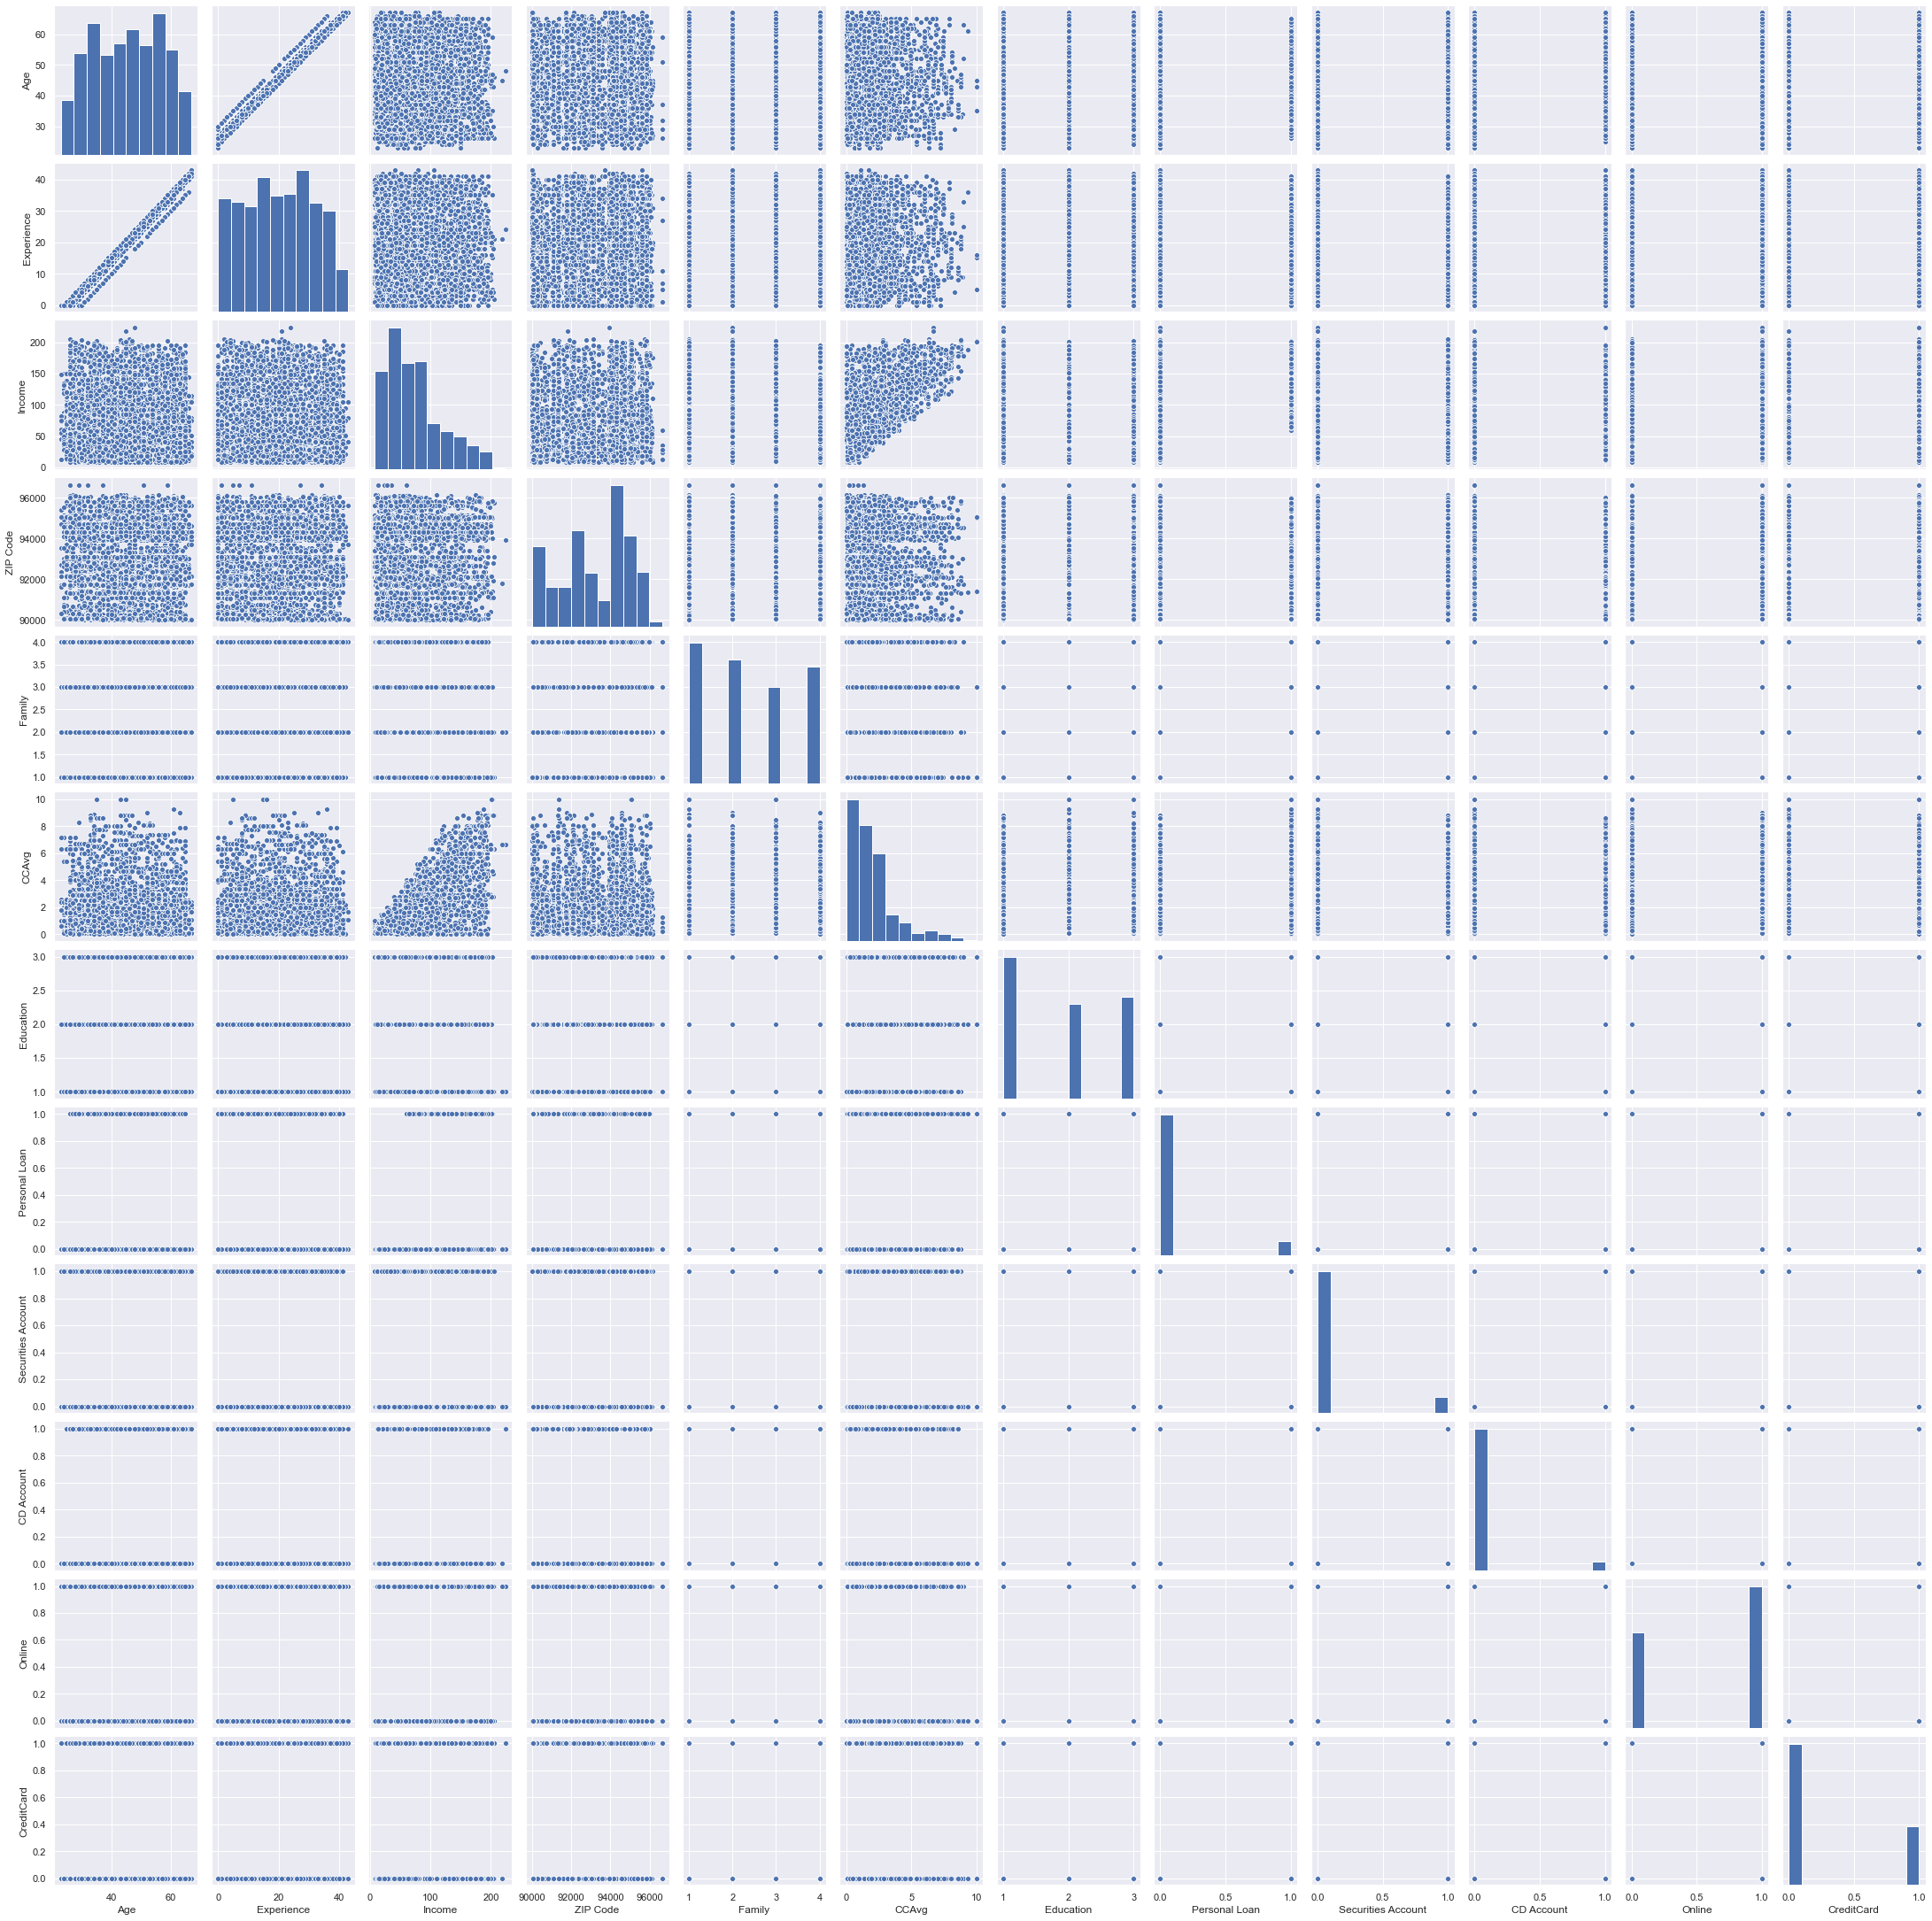

In [607]:
sns.pairplot(df0[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']])
plt.show()

<b>Findings</b>
- Customer Age is between 23 and 67 years with median at 45 with <b>atleast</b> 50%(2500) of them less than 45 years. 
- The minimum value of customer workd Experience is negative which shouldnt be the case. Data has to be corrected.
- Customer Income range is from 8 to 224. Its Very wide. Looks like low income customers are not taking personal loan. 
- Zip code min value is 4 digit compared to max 5 digit value. Need further analysis.
- Family size varies from 1 to 4
- Credit card average spending ranges from 0 to 10,000 with <b>atleast</b> 50%(2500) of them spending less than or equal to 1500.
- Regarding Education. all cases( 1: Undergrad; 2: Graduate; 3: Advanced/Professional) are there. More undergraduates compared to others (grad, advanced/Professional)
- Mortgage ranges from 0 to 635 with median at 0. So <b>atleast</b> 50%(2500) of the people have no mortgage.
- Regarding Personal loan, 75% is 0. So <b>atleast</b> 75%(3750) have not accepted the personal loans in the last campaign. Similar proportions for securities account and CD account. 
- <b>Atleast</b> 50%(2500) of the members should be having online account
- <b>Atleast</b> 50%(2500) of the members dont have the bank credit card.
- Looks like as the income is increasing the average credit card spending is also increasing.



<b> Get data model ready</b>

<b> 1. dropping the unnecessary columns </b>

In [608]:
print('Dropping the colunms as it is unique for each row')
loan_df = df0.drop('ID', axis =1 )

Dropping the colunms as it is unique for each row


<b> 2. Select dependent and independent variables </b>

In [609]:
## Define X and Y variables

X = loan_df.drop(['Personal Loan'], axis=1)
Y = loan_df[['Personal Loan']]

<b> 3. One hot encoding </b>. 

In [610]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [611]:
X['Education']=X['Education'].astype(object)
X['Family']=X['Family'].astype(object)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   object 
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   object 
 7   Mortgage            5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 468.9+ KB


In [612]:
X['Education'].replace([1],'Undergrad', inplace=True)
X['Education'].replace([2],'Graduate', inplace=True)
X['Education'].replace([3],'Advanced/Professional', inplace=True)
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,1


In [613]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X,  drop_first=False)

In [614]:
X.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,91107,1.6,0,1,0,0,0,0,0,0,1,0,0,1
1,45,19,34,90089,1.5,0,1,0,0,0,0,0,1,0,0,0,1
2,39,15,11,94720,1.0,0,0,0,0,0,1,0,0,0,0,0,1
3,35,9,100,94112,2.7,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,91330,1.0,0,0,0,0,1,0,0,0,1,0,1,0


# Step3
Split the data into training and test set in the ratio of 70:30 respectively (5 marks)



In [615]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

# Step4
Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)



In [616]:
##Importing the sklearn metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1);
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=1)

In [617]:
print('Coefficients')
print(logreg.coef_)
print()

print('Intercept')
print(logreg.intercept_)
print()

print('Parameters')
print(logreg.get_params(deep=True))
print()

Coefficients
[[-4.13281851e-04 -4.18026575e-04  3.63191050e-02 -6.55107656e-05
   1.10794409e-03  8.49509676e-04  9.40646241e-06  1.40650855e-04
   1.29112910e-05  5.84643621e-06 -5.83577732e-05 -3.50192224e-05
   6.84672355e-05  2.44988729e-05  7.79544943e-05  7.41499344e-05
  -1.52515316e-04]]

Intercept
[-4.10887277e-07]

Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



In [618]:
print('Y Prediction in 0s and 1s')
Y_predict = logreg.predict(X_train) 
print(Y_predict)
print()

print('Y Prediction Probability')
print('Firt element: probability that the data belong to class 0 ')
print('Second element refers to the probability that the data belong to class 1')
Y_predict_prob = logreg.predict_proba(X_train)
print(Y_predict_prob) 

Y Prediction in 0s and 1s
[0 0 0 ... 0 0 0]

Y Prediction Probability
Firt element: probability that the data belong to class 0 
Second element refers to the probability that the data belong to class 1
[[0.99285459 0.00714541]
 [0.99101434 0.00898566]
 [0.77941451 0.22058549]
 ...
 [0.99420056 0.00579944]
 [0.94674145 0.05325855]
 [0.97450539 0.02549461]]


In [619]:
##function to get confusion matrix 
def draw_confusion_matrix( actual, predicted):
    cm = confusion_matrix(actual, predicted)
    print(cm)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

#### Training Data: Model Metrics

Trainig accuracy is 0.9085714285714286

Confusion Matrix
[[3073   96]
 [ 224  107]]


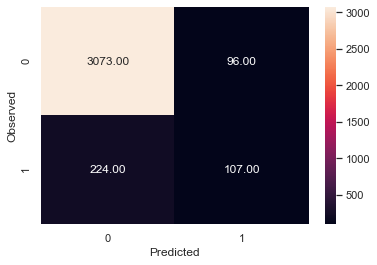

None

Recall: 0.32326283987915405

Precision: 0.5270935960591133

F1 Score: 0.40074906367041196

Log Loss: 3.157852916492777



In [620]:
#Regression Score
print("Trainig accuracy is",logreg.score(X_train,Y_train))  
print()

print('Confusion Matrix')
print(draw_cm(Y_train,Y_predict))
print()

print("Recall:",recall_score(Y_train,Y_predict))  #TP  / (TP + FN) 
print()

print("Precision:",precision_score(Y_train,Y_predict))#TP/(TP + FP)
print()

print("F1 Score:",f1_score(Y_train,Y_predict))#harmonic mean of Precision and Recall
print()

print("Log Loss:",log_loss(Y_train,Y_predict))
print()

* True Positive(who take the personal loan if targetted by campaign) : 107
* False Postive(who will not take the personal loan out of the targeted) : 96
* True Negative(who dont take the personal loan and not targetted for campaign) : 3073
* False Negative(who will take loan but not targetted by campaign) : 224


#### Test Data: Model Metrics

In [621]:
print("Testing accuracy",logreg.score(X_test, Y_test))
print()

Y_predict = logreg.predict(X_test)



Testing accuracy 0.908



Confusion Matrix
[[1318   33]
 [ 105   44]]


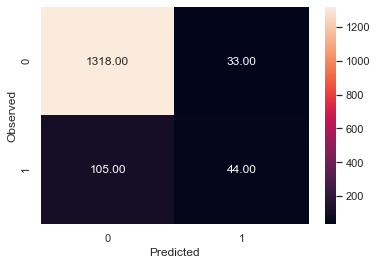

None

Recall: 0.2953020134228188

Precision: 0.5714285714285714

F1 Score: 0.3893805309734513

Log Loss: 3.177585019475248



In [622]:
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()

print("Recall:",recall_score(Y_test,Y_predict))
print()

print("Precision:",precision_score(Y_test,Y_predict))
print()

print("F1 Score:",f1_score(Y_test,Y_predict))
print()

print("Log Loss:",log_loss(Y_test,Y_predict))
print()

* True Positive(who take the personal loan if targetted by campaign) : 44
* False Postive(who will not take the personal loan out of the targeted) : 33
* True Negative(who dont take the personal loan and not targetted for campaign) : 1318
* False Negative(who will take loan but not targetted by campaign) : 105

In [623]:
print("Roc Auc Score:",roc_auc_score(Y_train,logreg.predict(X_train)))

Roc Auc Score: 0.6464846859540926


AUC ROC curve


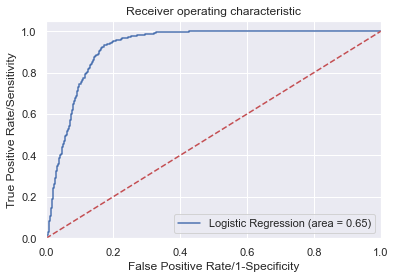

In [624]:
print('AUC ROC curve')
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(Y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate/1-Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [625]:
#Extracting FPR, TPR and Thresholds from the ROC Curve
fpr, tpr, thresholds =roc_curve(Y_train, logreg.predict_proba(X_train)[:,1])


#Converting FPR/TPR/Threshold into Data Frame
FPR=pd.DataFrame(fpr)
FPR.rename(columns = {0:'False Positive Rate'}, inplace = True)


TRP=pd.DataFrame(tpr)
TRP.rename(columns = {0:'True Positive Rate'}, inplace = True)

THRESHOLD=pd.DataFrame(thresholds)
THRESHOLD.rename(columns = {0:'Threshold'}, inplace = True)


#Display Results
result = pd.concat([FPR, TRP, THRESHOLD], axis=1, sort=False)
result['True Negative Rate']=1-result['False Positive Rate']
result.head(10)


,False Positive Rate,True Positive Rate,Threshold,True Negative Rate
0,0.000000,0.000000,1.876413,1.000000
1,0.000316,0.000000,0.876413,0.999684
2,0.001893,0.000000,0.827985,0.998107
3,0.001893,0.006042,0.815479,0.998107
4,0.002524,0.006042,0.797833,0.997476
5,0.002524,0.009063,0.795593,0.997476
6,0.002840,0.009063,0.789837,0.997160
7,0.002840,0.012085,0.788467,0.997160
8,0.003471,0.012085,0.786868,0.996529
9,0.003471,0.015106,0.783743,0.996529


,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.876413
1,0.000316,0.000000,0.999684,-0.999684,0.876413
2,0.001893,0.000000,0.998107,-0.998107,0.827985
3,0.001893,0.006042,0.998107,-0.992064,0.815479
4,0.002524,0.006042,0.997476,-0.991433,0.797833


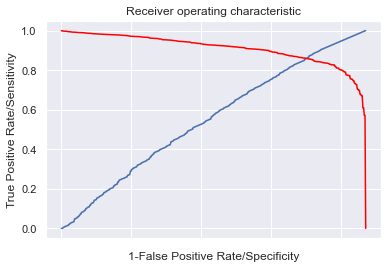

In [626]:
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point

import pylab as pl

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate/Specificity')
pl.ylabel('True Positive Rate/Sensitivity')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

display(roc.head())

In [627]:
roc[(roc['tpr']>0.85) & (roc['tpr']<0.98)].head(50)

,fpr,tpr,1-fpr,tf,thresholds
349,0.138530,0.858006,0.861470,-0.003464,0.113846
350,0.140423,0.858006,0.859577,-0.001571,0.111673
351,0.140423,0.861027,0.859577,0.001450,0.111571
352,0.141685,0.861027,0.858315,0.002712,0.110910
353,0.141685,0.864048,0.858315,0.005733,0.110692
354,0.142316,0.864048,0.857684,0.006365,0.110488
355,0.142316,0.873112,0.857684,0.015428,0.109963
356,0.144210,0.873112,0.855790,0.017321,0.108167
357,0.144210,0.876133,0.855790,0.020342,0.107142
358,0.145156,0.876133,0.854844,0.021289,0.106457


In [628]:
# setting the threshold and calculating the accuracy, precision
clf = LogisticRegression(random_state=42)
clf.fit(X_train, Y_train)
THRESHOLD = 0.5
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(Y_test, preds), recall_score(Y_test, preds),
                   precision_score(Y_test, preds), roc_auc_score(Y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.908000
recall,0.295302
precision,0.571429
roc_auc_score,0.635438


# Step 5
Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)



In [629]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [630]:
# Running a loop to check different values of 'solver'

train_score=[]
test_score=[]
solver_info=[]
class_info=[]
C_info=[]

solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[None,'balanced']
C = [0.01,0.1,0.25,0.5,0.75,1]


for i in solver:
    for j in C:
        for k in class_weight:

            # changing values of  class weight, C and solver  
            model = LogisticRegression(random_state=1, class_weight=k, C = j,solver=i)  
            model.fit(X_train, Y_train) 
            y_predict = model.predict(X_test) 
    
            train_score.append(round(model.score(X_train, Y_train),3))
            test_score.append(round(model.score(X_test, Y_test),3))
            
            solver_info.append(i)
            C_info.append(j)
            class_info.append(k)

In [631]:
i = np.arange(len(train_score))
resultDF = pd.DataFrame({'Solver': pd.Series(solver_info,index=i),'C Value' : pd.Series(C_info, index=i),\
                    'Class Weight' : pd.Series(class_info, index = i),'train_scores' : pd.Series(train_score, index = i),
                   'test_scores' : pd.Series(test_score, index = i)})

In [632]:
resultDF

,Solver,C Value,Class Weight,train_scores,test_scores
0,newton-cg,0.01,None,0.937,0.932
1,newton-cg,0.01,balanced,0.892,0.888
2,newton-cg,0.10,None,0.957,0.952
3,newton-cg,0.10,balanced,0.913,0.909
4,newton-cg,0.25,None,0.960,0.952
5,newton-cg,0.25,balanced,0.915,0.910
6,newton-cg,0.50,None,0.961,0.956
7,newton-cg,0.50,balanced,0.915,0.911
8,newton-cg,0.75,None,0.962,0.957
9,newton-cg,0.75,balanced,0.914,0.909


In [633]:
resultDF[resultDF['test_scores']==resultDF['test_scores'].max()]

,Solver,C Value,Class Weight,train_scores,test_scores
8,newton-cg,0.75,None,0.962,0.957
10,newton-cg,1.00,None,0.962,0.957


Test score is high when Solver is newton-cg, C value is .75 or 1 and Class weight is None

# Step6
<b>Give Business understanding of your model? (5 marks)</b>

From the <b>Test Data</b>
* True Positive(who take the personal loan if targetted by campaign) : 44
* False Postive(who will not take the personal loan out of the targeted) : 33
* True Negative(who dont take the personal loan and not targetted for campaign) : 1318
* False Negative(who will take loan but not targetted by campaign) : 105
* Precision: 0.5714285714285714

The objective of the bank targetted marketting is to have high personal loan buying success ratio with a minimal budget.
To achieve high success ratio, the bank campaign target should be customers with high likelihood of taking personal loan. It means the False Positive(shouldnt target customer with less likelihood of taking personal loand) should be low. If FP is high bank success ratio will go down and lose money. 

Therefore the Precision should be high.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

After achieving the desired precision we can deploy the model to predict the target customers for campaign.

In [634]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(Y_train, sm.add_constant(X_train))

lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.107508
         Iterations 9


In [635]:
#Summary of logistic regression
from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3484
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:                  0.6565
Time:                        07:18:12   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.217e-298
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.9927        nan        nan        nan         nan         nan
Age                                -0.0087      0.082     -0.107    